# Hrant Gharagyozyan, DSB 2023-2024

## Importing Packages and Data

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv("weather-check.csv")
data.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


## Exploring and Transforming Necessary Variables

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   RespondentID                                                                                                                                  928 non-null    int64 
 1   Do you typically check a daily weather report?                                                                                                928 non-null    object
 2   How do you typically check the weather?                                                                                                       928 non-null    object
 3   A specific website or app (please provide

In [98]:
unique_regions = data['US Region'].unique()
print(unique_regions)

['South Atlantic' '-' 'Middle Atlantic' 'West South Central' 'Pacific'
 'West North Central' 'East North Central' 'Mountain' 'New England'
 'East South Central']


In [99]:
data['US Region'] = data['US Region'].replace('-', 'No answer')
data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] = data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].replace('-', 'No Answer')
priority_order1 = ['Very likely', 'Somewhat likely', 'Somewhat unlikely', 'Very unlikely', 'No Answer']
priority_order2 = ['No answer','East North Central', 'East South Central', 'Middle Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central']
data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] = pd.Categorical(data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'], categories = priority_order1, ordered = True)
data['US Region'] = pd.Categorical(data['US Region'], categories = priority_order2, ordered = True)
data.head(3)

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,No answer
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic


## Creating Subplots for 100% Stacked and Absolut Stacked Barcharts and Comments

In [188]:
comment = "Նկատենք, որ տվյալները սորտավորված չեն, քանի որ նպատակահարմար չհամարեցի երկու իրար կողք կողքի գտնվող գրաֆիկների y առանցքներում \nգրված լիներ US Region-ը, ընդ որում՝ տարբեր հերթականությամբ։ Սորտավորման արդյունքում նույն տողում գտնվող bar-երը կհամապատասխանեին \nտարբեր ռեգիոնների և կարիք կառաջանար աջ գրաֆիկի y առանցքում նույնպես տեղադրել ռեգիոնների անունները։ \n\nՈրպես ասվածի օրինակ դիտարկենք հետևյալ դեպքը․ սորտավորենք 2 գրաֆիկներըը ըստ ՛Very likely՛ կատեգորիայի։ Այս պարագայում ՛East South Central՛\nռեգիոնին համապատասխանող bar-ը ձախ գրաֆիկում կլինի բարձր դիրքում, իսկ աջում՝ բավական ցածր։ \n\nԳրաֆիկներից կարող ենք նկատել նաև, որ այն մարդիկ, ովքեր չեն նշել, թե որ ռեգիոնից են, մոտ 35 տոկոս դեպքերում խուսափել էլ են նաև այս հարցին \nպատասխանել, սակայն ռեգիոնը չնշողների և միաժամանակ նշված հարցին չպատասխանողների թիվը այնքան էլ մեծ չէ` մոտ 10 հոգի։"

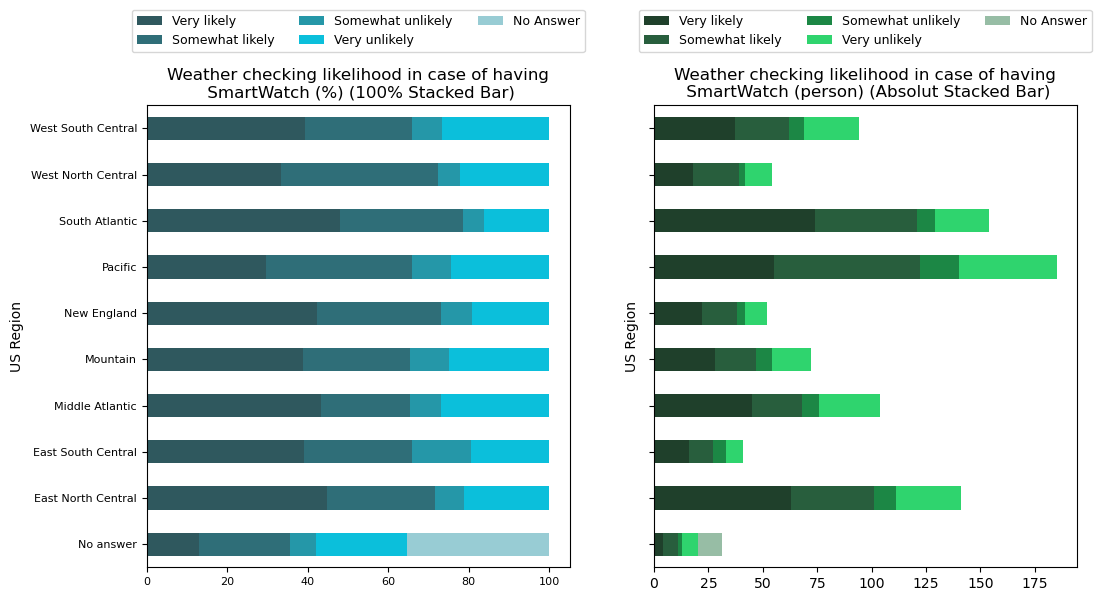

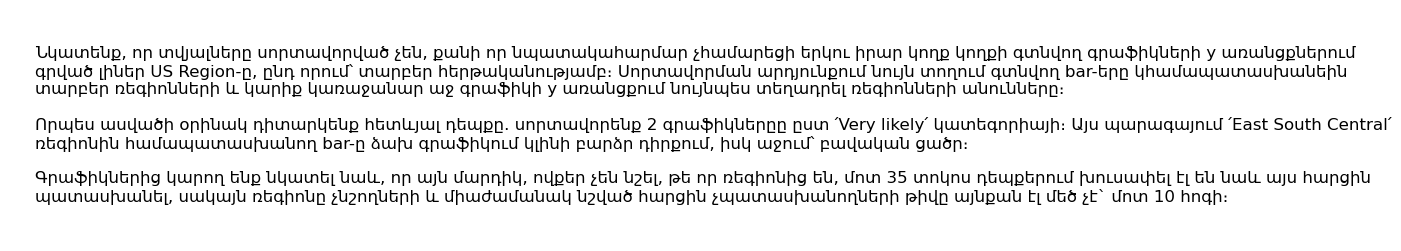

In [190]:
normalized_counts = data.groupby('US Region')['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].value_counts(normalize=True).unstack().fillna(0) * 100
counts = data.groupby('US Region')['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].value_counts().unstack().fillna(0)

colors1 = ["#2f585e", "#2f6e78", "#2597a8", "#0bbfdb", "#98ccd4"]
colors2 = ["#1f402b", "#285e3d", "#1c8745", "#2fd46e", "#97bda5"]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

normalized_counts.plot(kind='barh', stacked=True, ax=axs[0], color=colors1)
axs[0].set_title('Weather checking likelihood in case of having\n SmartWatch (%) (100% Stacked Bar)')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3, fontsize=9)
axs[0].tick_params(axis='both', which='major', labelsize=8)

counts.plot(kind='barh', stacked=True, ax=axs[1], color=colors2)
axs[1].set_title('Weather checking likelihood in case of having\n SmartWatch (person) (Absolut Stacked Bar)')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3, fontsize=9)
axs[1].tick_params(axis='y', bottom = False, labelbottom = False)
axs[1].set_yticklabels([])

fig, ax3 = plt.subplots(figsize=(16, 3))
ax3.text(0.02, 0.5, comment, ha='left', va='center', fontsize=12)
ax3.tick_params(axis='both', bottom = False, labelbottom = False)
ax3.set_yticklabels([])
ax3.axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()